In [22]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
# array.Tについて
arr3d = np.arange(9).reshape((3,3))
arr3d

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

次に転置行列を求めます。

In [27]:
arr3d.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

Khai báo và biểu diễn dữ liệu trên một đồ thị

In [31]:
# height (cm)
# 2次元アレイ
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T#   each row is a point 
X

array([[147],
       [150],
       [153],
       [158],
       [163],
       [165],
       [168],
       [170],
       [173],
       [175],
       [178],
       [180],
       [183]])

In [32]:
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
y

array([[49],
       [50],
       [51],
       [54],
       [58],
       [59],
       [60],
       [62],
       [63],
       [64],
       [66],
       [67],
       [68]])

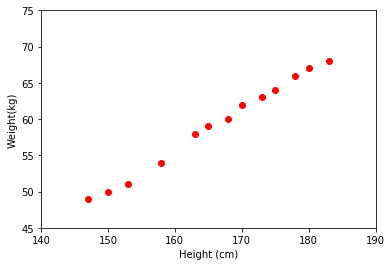

In [39]:
# Visualize data
plt.plot(X,y,'ro') 
# "r"はredの省略
# "o"は小さい円(circle marker)
# Axis: x軸やy軸など軸を表すクラス(Artistの派生クラス)
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight(kg)')
plt.show()

Từ đồ thị này ta thấy rằng dữ liệu được sắp xếp gần như theo 1 đường thẳng, vậy mô hình Linear Regression nhiều khả năng sẽ cho kết quả tốt:
(cân nặng) = w_1*(chiều cao) + w_0

# 3.3. Nghiệm theo công thức

Tiếp theo, chúng ta sẽ tính toán các hệ số w_1 và w_0 dựa vào công thức 
(5). 
https://machinelearningcoban.com/2016/12/28/linearregression/
Chú ý: giả nghịch đảo của một ma trận A trong Python sẽ được tính bằng numpy.linalg.pinv(A), pinv là từ viết tắt của pseudo inverse(giả nghịch đảo).

In [44]:
# Building Xbar
one = np.ones((X.shape[0], 1))
one

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [45]:
X

array([[147],
       [150],
       [153],
       [158],
       [163],
       [165],
       [168],
       [170],
       [173],
       [175],
       [178],
       [180],
       [183]])

In [48]:
Xbar = np.concatenate((one,X), axis = 1)
Xbar

array([[   1.,  147.],
       [   1.,  150.],
       [   1.,  153.],
       [   1.,  158.],
       [   1.,  163.],
       [   1.,  165.],
       [   1.,  168.],
       [   1.,  170.],
       [   1.,  173.],
       [   1.,  175.],
       [   1.,  178.],
       [   1.,  180.],
       [   1.,  183.]])

In [53]:
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
A

array([[  1.30000000e+01,   2.16300000e+03],
       [  2.16300000e+03,   3.61527000e+05]])

In [55]:
b = np.dot(Xbar.T, y)
b

array([[    771.],
       [ 129198.]])

In [57]:
w = np.dot(np.linalg.pinv(A),b)
w

array([[-33.73541021],
       [  0.55920496]])

In [59]:
# Preparing the fitting line
w_0 = w[0][0]
w_0

-33.735410205788867

In [60]:
w_1 = w[1][0]
w_1

0.55920496193957092

In [65]:
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1*x0
x0

array([ 145.,  185.])

In [66]:
y0

array([ 47.34930928,  69.71750775])

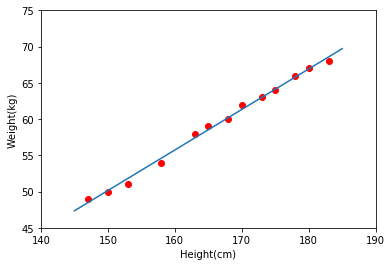

In [67]:
# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') #data
plt.plot(x0,y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

Từ đồ thị bên trên ta thấy rằng các điểm dữ liệu màu đỏ nằm khá gần đường thẳng dự đoán màu xanh. Vậy mô hình Linear Regression hoạt động tốt với tập dữ liệu training. Bây giờ, chúng ta sử dụng mô hình này để dự đoán cân nặng của hai người có chiều cao 155 và 160 cm mà chúng ta đã không dùng khi tính toán nghiệm.

In [68]:
y1 = w_1*155 + w_0
y2 = w_1*160 + w_0
print(u'Predict weight of person with height 155cm: %.2f(kg), real number: 52(kg)' %(y1))
print(u'Predict weight of person with height 160cm: %.2f(kg), real number: 56(kg)' %(y2))

Predict weight of person with height 155cm: 52.94(kg), real number: 52(kg)
Predict weight of person with height 160cm: 55.74(kg), real number: 56(kg)


Chúng ta thấy rằng kết quả dự đoán khá gần với số liệu thực tế.

# 3.4. Nghiệm theo thư viện scikit-learn

In [70]:
from sklearn import datasets, linear_model

# fit the model by Linear Regression
regr = linear_model.LinearRegression(fit_intercept= False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# Compare two results
print( 'Solution found by scikit-learn  : ', regr.coef_ )
print('Solution found by (5): ', w.T)

Solution found by scikit-learn  :  [[-33.73541021   0.55920496]]
Solution found by (5):  [[-33.73541021   0.55920496]]


In [71]:
# Chúng ta thấy rằng hai kết quả thu được như nhau! 